# Sales Analysis

## Import Necessary Libraries

In [11]:
import pandas as pd
import os

## Merging 12 months of sales data into a single file

In [20]:
path="C:/Users/nexia/Desktop/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data"

files=[file for file in os.listdir(path)]

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data= pd.concat([all_months_data, current_data])

all_months_data.to_csv("all_data.csv", index=False)



In [24]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Read in updated dataframe

In [31]:
all_data= pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Clean up the data

##### Drop rows of NAN

In [33]:
#Find NAN
nan_df=all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data= all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Get rid of text in order date column

In [35]:
all_data= all_data[all_data['Order Date'].str[0:2]!='Or']

#### Make columns correct type

In [37]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])

In [39]:
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])

### Adding usefull columns

#### Add month column

In [56]:
all_data['Month']=all_data['Order Date'].str[0:2]
all_data['Month']= all_data['Month'].astype('int')
all_data.head()


## alternative method:
# all_data['Month2']= pd.to_datetime(all_data['Order Date']).dt.month

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99


#### Add city column

In [42]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City']= all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


### Question 1: What was the best month for sales? How much was earned that month?

In [50]:
all_data['Sales']= all_data['Quantity Ordered'].astype('int')*all_data['Price Each'].astype('float')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99


In [61]:
results=all_data.groupby(['Month']).sum(['Sales'])

In [60]:
import matplotlib.pyplot as plt

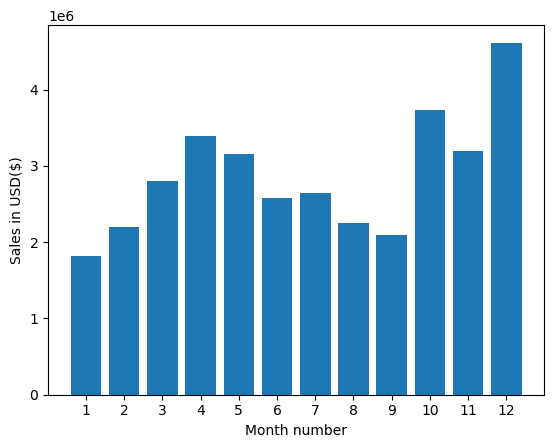

In [67]:
months=range(1,13)


plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD($)')
plt.xlabel('Month number')
plt.show()

###  What city sold the most product?

In [76]:
resultscity=all_data.groupby('City').sum('Quantity Ordered')
resultscity

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


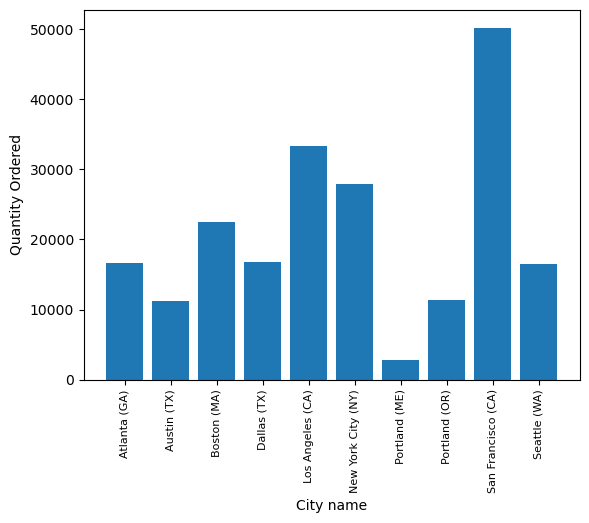

In [82]:
cities=[city for city, df in all_data.groupby('City')]

plt.bar(cities,resultscity['Quantity Ordered'])
plt.xticks(cities, rotation='vertical',size=8)
plt.ylabel('Quantity Ordered')
plt.xlabel('City name')
plt.show()

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [88]:
# Add hour column
#all_data['Hour']=pd.to_datetime(all_data['Order Date']).dt.hour
#all_data['Minute']=pd.to_datetime(all_data['Order Date']).dt.minute
#all_data['Count']=1
#all_data.head()


#When parsing a column into datetime, specifying the format manually will decrease the execution time significantly:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format='%m/%d/%y %H:%M')

all_data['Hour']=all_data['Order Date'].dt.hour
all_data['Minute']=all_data['Order Date'].dt.minute

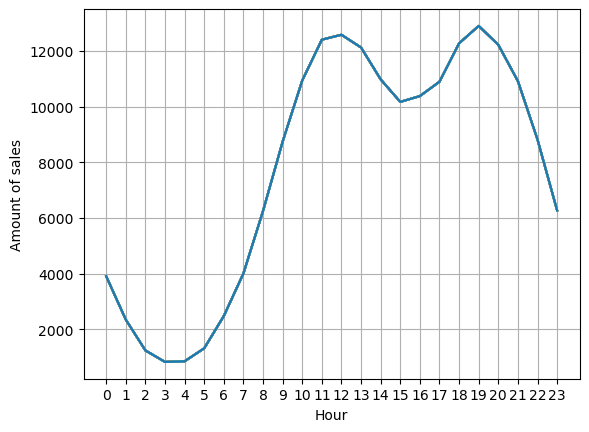

In [89]:
hours=[hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours,all_data.groupby(['Hour']).count())

plt.ylabel('Amount of sales')
plt.xlabel('Hour')
plt.xticks(hours)
plt.grid()

### Question 4: What product sold the most? Why do you think it sold the most?


In [104]:
resultsproduct=all_data.groupby(['Product']).sum(['Quantity Ordered'])

In [102]:
products=[product for product, df in all_data.groupby('Product')]

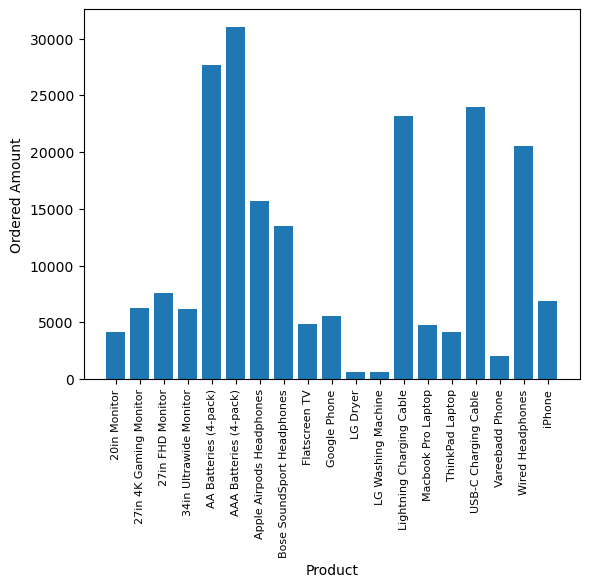

In [111]:
plt.bar(products,resultsproduct['Quantity Ordered'])
plt.xticks(rotation='vertical',size=8)
plt.ylabel('Ordered Amount')
plt.xlabel('Product')
plt.show()

In [143]:
prices = all_data.groupby('Product')['Price Each'].mean()


C:\Users\nexia\AppData\Local\Temp\ipykernel_12200\760167960.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation='vertical', size=8)


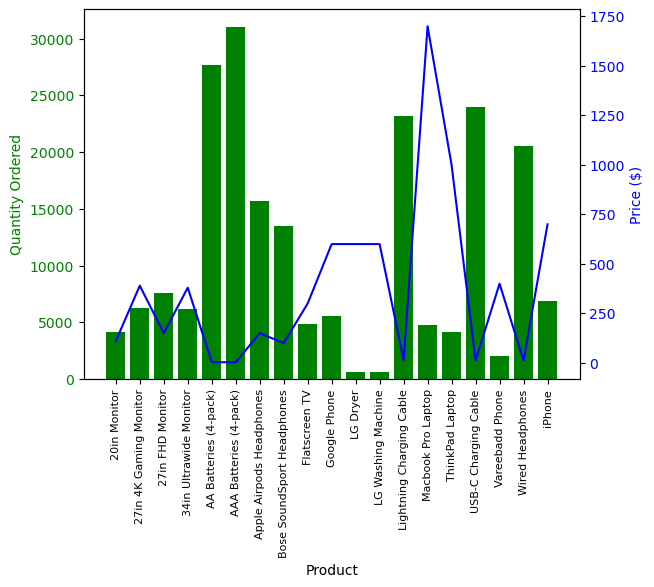

In [156]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib


fig, ax1 = plt.subplots()

ax1.bar(products, resultsproduct['Quantity Ordered'],color='g')
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='g')
ax1.tick_params(axis='y', labelcolor='g')
ax1.set_xticklabels(products, rotation='vertical', size=8)


ax2=ax1.twinx()
ax2.plot(products, prices, color='b')
ax2.set_ylabel('Price ($)', color='b')
ax2.tick_params(axis='y',labelcolor='b')

plt.show()